In [1]:
import pandas as pd
import glob

In [2]:
completeness_path_base = r'../data/variables_profiles'
completeness_files_path = f'{completeness_path_base}/CUM70_*.csv'
print('Completitud:', completeness_files_path)

Completitud: ../data/variables_profiles/CUM70_*.csv


In [3]:
completeness_files = glob.glob(completeness_files_path)
print(completeness_files)

['../data/variables_profiles\\CUM70_TMN_CON.csv', '../data/variables_profiles\\CUM70_TMX_CON.csv']


In [4]:
completeness_dtypes = {
    'codigo':'string',
    'cuenca':'category',
    'variable':'category',
}
completeness = pd.concat([pd.read_csv(file, dtype = completeness_dtypes, index_col = 'codigo') \
                          for file in completeness_files], axis = 0)
print(completeness.shape)
completeness.head()

(36, 2)


,cuenca,variable
codigo,,
11025010,198,TMN_CON
11045010,311,TMN_CON
13075020,174,TMN_CON
16015030,167,TMN_CON
21115060,22,TMN_CON


In [5]:
#completeness.reset_index()
station_completeness = pd.pivot_table(data = completeness.reset_index(), values='variable', index=['codigo', 'cuenca'],
                    columns=['variable'], aggfunc=len, fill_value=0)

In [7]:
cuenca_completeness = station_completeness.reset_index()
#[station_completeness[['PTPM_CON']].min(axis = 1) > 0]
#cuenca_completeness.set_index('codigo')
cuenca_completeness = cuenca_completeness.groupby('cuenca').sum().reset_index()
cuenca_completeness.set_index('cuenca', inplace = True)

#variables_valid = ['PTPM_CON', 'Q_MEDIA_D','TMN_CON', 'TMX_CON']
#variables_valid = ['PTPM_CON', 'PT_10_TT_D', 'Q_MEDIA_D', 'Q_MN_D', 'Q_MX_D','TMN_CON', 'TMX_CON']
variables_valid = ['TMN_CON', 'TMX_CON']

cuenca_completeness[cuenca_completeness[variables_valid].min(axis = 1) > 0]

variable,TMN_CON,TMX_CON
cuenca,,
174,1,1
22,1,1
262,1,1
311,1,1
32,1,1
5,1,1
71,1,1
83,2,1
89,3,1


In [8]:
#variables_valid = ['PTPM_CON']#, 'PT_10_TT_D', 'Q_MEDIA_D', 'Q_MN_D', 'Q_MX_D','TMN_CON', 'TMX_CON']

for var in variables_valid:
    #cuenca_completeness[var] = cuenca_completeness[var].mask(cuenca_completeness[var] > 3, 3)
    cuenca_completeness.loc[cuenca_completeness[var] > 3, var] = 3
    
#cuenca_completeness

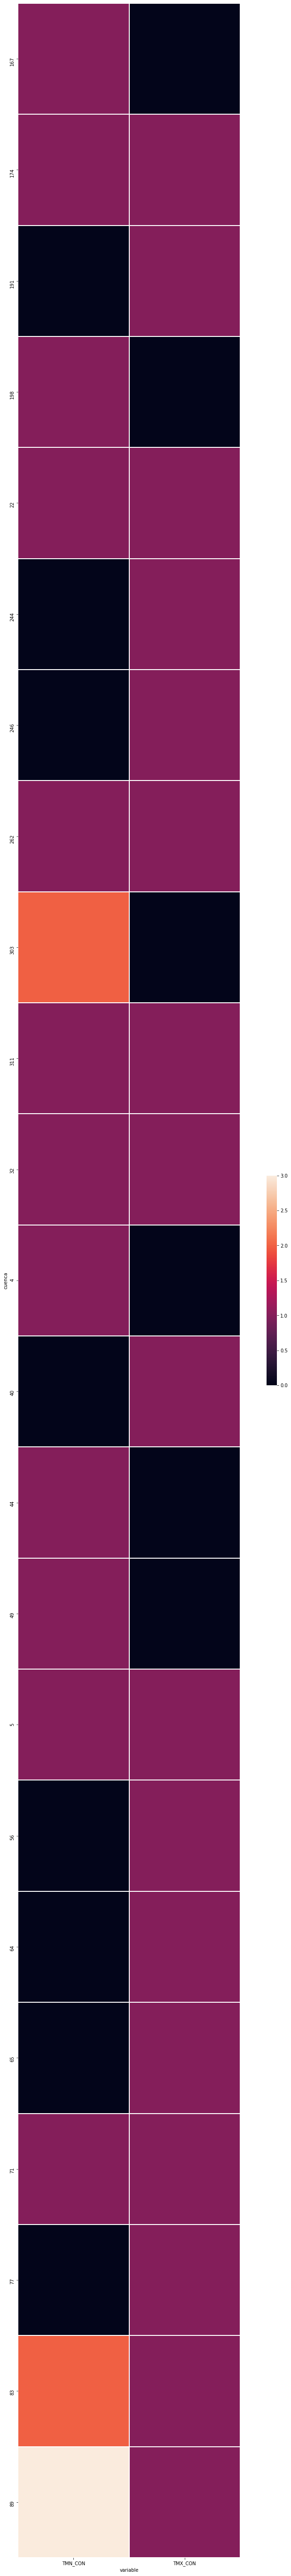

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,100))
ax = plt.axes()
#ax.set_title(f"{estacion_type} {variable_perfil} ({etiqueta_perfil})")

sns.heatmap(cuenca_completeness,
    square = True,
    cbar_kws = {'fraction' : 0.02},
    #cmap = 'YlGnBu',
    linewidth = 1,
    #annot = True, fmt = "d",
    ax = ax
   )